In [41]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('Mall-Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
dataset.count()

CustomerID                200
Genre                     200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

In [43]:
X = dataset.iloc[:,[3,4]].values

In [44]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

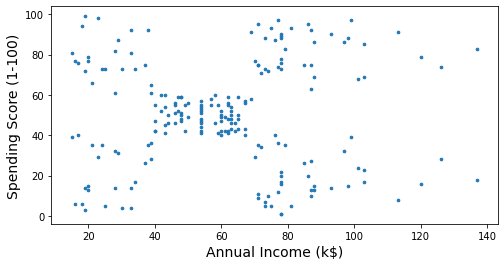

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], s=7)
plt.xlabel("Annual Income (k$)", fontsize=14)
plt.ylabel("Spending Score (1-100)", fontsize=14)
plt.show()

In [46]:
from sklearn.cluster import KMeans

#misal dicoba dengan 5 klaster
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [47]:
y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [48]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [49]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=4)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("Annual Income (k$)", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("Spending Score (1-100)", fontsize=14)
    else:
        plt.tick_params(labelleft=False)

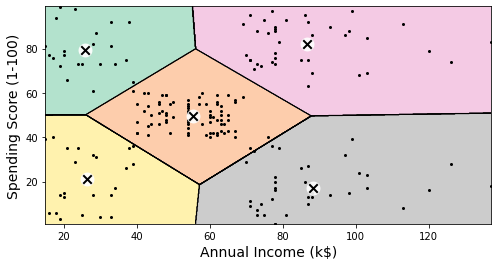

In [50]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [51]:
#menentukan jumlah klaster dengan metode elbow

In [52]:
def plot_clusterer_comparison(clusterer1, clusterer2, X):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)

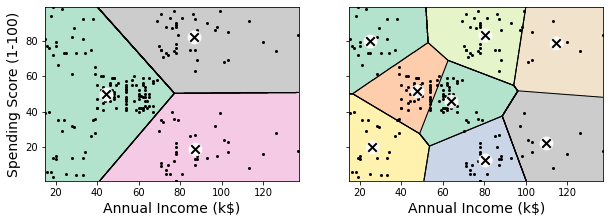

In [53]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X)
plt.show()

In [54]:
kmeans_k3.inertia_

106348.37306211119

In [55]:
kmeans_k8.inertia_

25336.94686147186

In [56]:
kmeans_per_k = []
inertias = []

for k in range(1,10):
    kmeans_per_k.append(KMeans(n_clusters=k, random_state=42).fit(X))

for model in kmeans_per_k:
    inertias.append(model.inertia_)

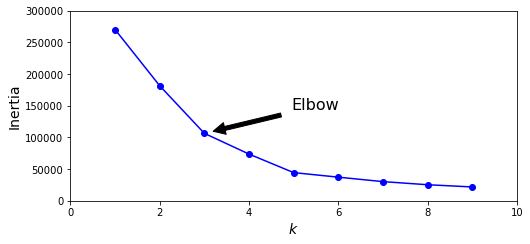

In [57]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([0, 10, 0, 300000])
plt.show()

In [58]:
#menentukan jumlah klaster dengan silhouette score

In [59]:
from sklearn.metrics import silhouette_score

In [60]:
silhouette_score(X, kmeans.labels_)

0.553931997444648

In [61]:
silhouette_scores = []

for model in kmeans_per_k[1:]:
    silhouette_scores.append(silhouette_score(X, model.labels_))

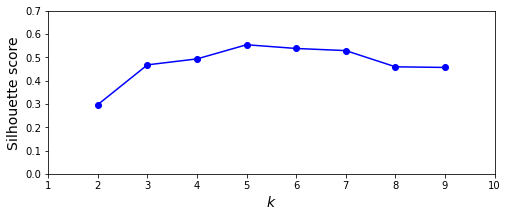

In [62]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1, 10, 0, 0.7])
plt.show()

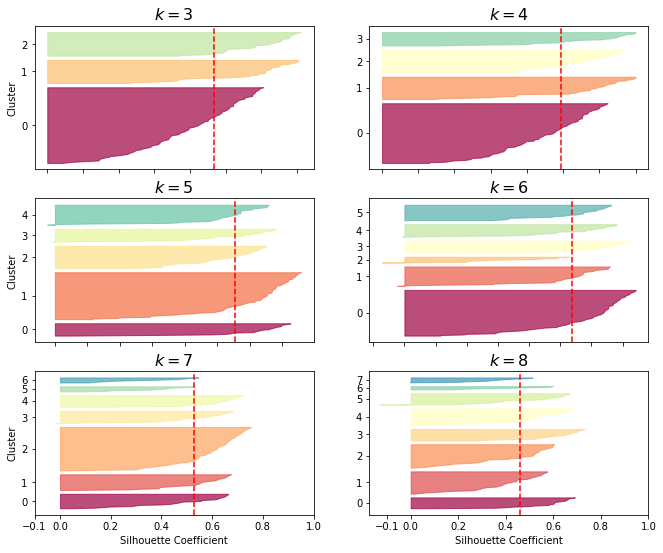

In [63]:
from sklearn.metrics import silhouette_samples
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6, 7, 8):
    plt.subplot(3, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5, 7):
        plt.ylabel("Cluster")
    
    if k in (7, 8):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

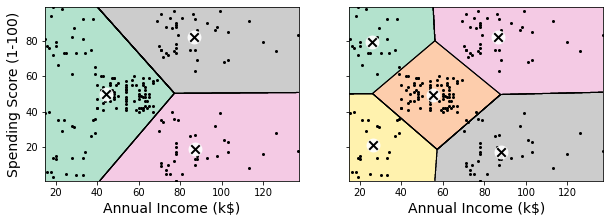

In [64]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k5 = KMeans(n_clusters=5, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k5, X)
plt.show()

Ketika menggunakan metode elbow, titik perubahan inertia paling dratis terjadi pada titik/ketika k = 3, maka ditentukan jumlah klaster yang paling optimal adalah sebanyak 3 klaster(k = 3):
-klaster yang hijau merupakan kumpulan orang yang berpendapatan rendah hingga menengah, dengan tingkat pengeluaran yang kecil hingga besar.
-klaster yang ungu merupakan kumpulan orang yang berpendapatan menengah hingga tinggi, dengan tingkat pengeluaran yang kecil hingga sedang.
-klaster yang abu-abu merupakan kumpulan orang yang berpendapatan menengah hingga tinggi, dengan tingkat pengeluaran yang sedang hingga besar.

Ketika menggunakan metode silhouette scores, beberapa k sebenarnya memiliki hasil yang bagus, tapi jumlah klaster yang saya tentukan adalah sebanyak 5 klaster(k = 5), karena dari gambaran diatas data yang misclassified sangat kecil(sedikit) dan setiap klaster memiliki panjang yang kurang lebih sama(terbagi merata/sama besar) dan sudah melewati batas nilai koefisien silhouette:
-klaster yang kuning merupakan kumpulan orang yang berpendapatan rendah, dengan tingkat pengeluaran yang kecil.
-klaster yang hijau merupakan kumpulan orang yang berpendapatan rendah, dengan tingkat pengeluaran yang besar.
-klaster yang jingga merupakan kumpulan orang yang berpendapatan menengah, dengan tingkat pengeluaran yang sedang.
-klaster yang abu-abu merupakan kumpulan orang yang berpendapatan menengah hingga tinggi, dengan tingkat pengeluaran yang kecil hingga sedang.
-klaster yang ungu merupakan kumpulan orang yang berpendapatan menengah hingga tinggi, dengan tingkat pengeluaran yang sedang hingga besar.